In [9]:
# -*- encoding: utf-8 -*-
import sys
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# env: windows
PATH_IMAGE = 'D:\\My_Data\\me_Docs\\Masterarbeit\\master_border_extraction\\images\\test1.png'
img_origin_color = cv2.imread(PATH_IMAGE, cv2.IMREAD_COLOR)  # color image
img_origin_gray = cv2.imread(PATH_IMAGE, cv2.IMREAD_GRAYSCALE) # gray image

Infos

In [17]:
dimensions = img_origin_color.shape
print(dimensions) # (2064, 3088, 3) => height, width pixels, channels 

(2064, 3088, 3)


Show image: color & grayscale

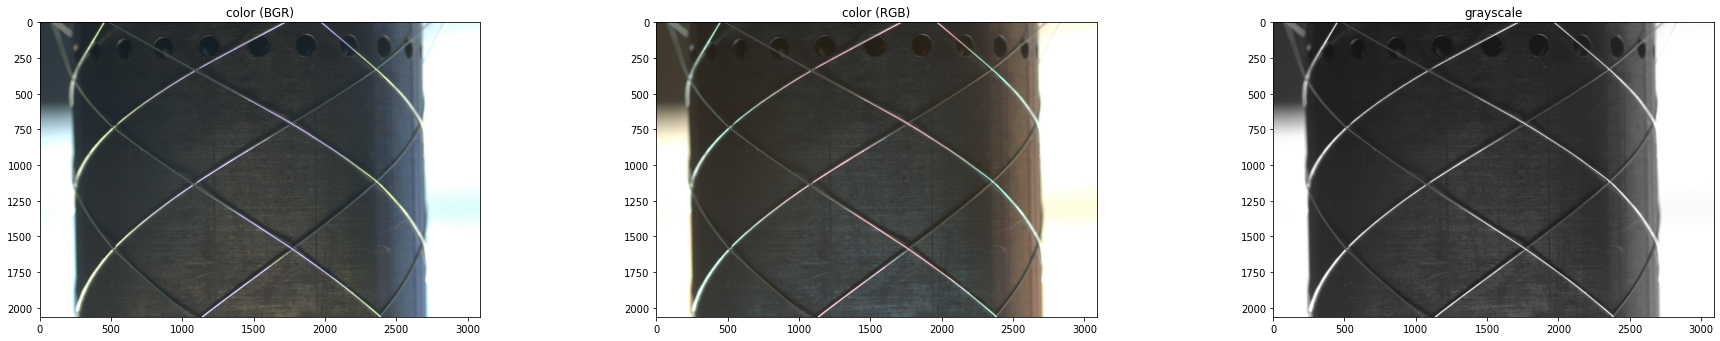

In [15]:
plt.figure(num=1, figsize=(30, 60))
plt.subplots_adjust(wspace=0.4, hspace=0.4) # adjust the distance between subplots
plt.subplot(1, 3, 1)
plt.title('color (BGR)')
plt.imshow(img_origin_color)  # b-g-r color image

img_rgb = cv2.cvtColor(img_origin_color, cv2.COLOR_BGR2RGB)
plt.subplot(1, 3, 2)
plt.title('color (RGB)')
plt.imshow(img_rgb)

plt.subplot(1, 3, 3)
plt.title('grayscale')
plt.imshow(img_origin_gray, cmap='gray')

# 1 For grayscale

1. Check: Histogramm

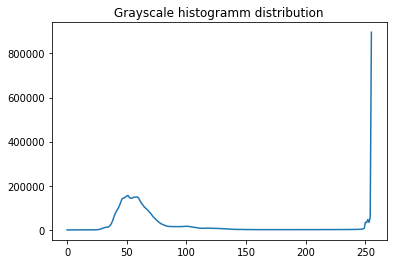

In [26]:
hist_gray = cv2.calcHist([img_origin_gray],[0],None,[256],[0,256])   # shape is (256, 1)
plt.title('Grayscale histogramm distribution')
plt.plot(hist_gray)

!!! TODOs
- [1] discover the meaning of two parts
- [2] set the left part to 0 => check the effect

2.1 Equalization (HE)

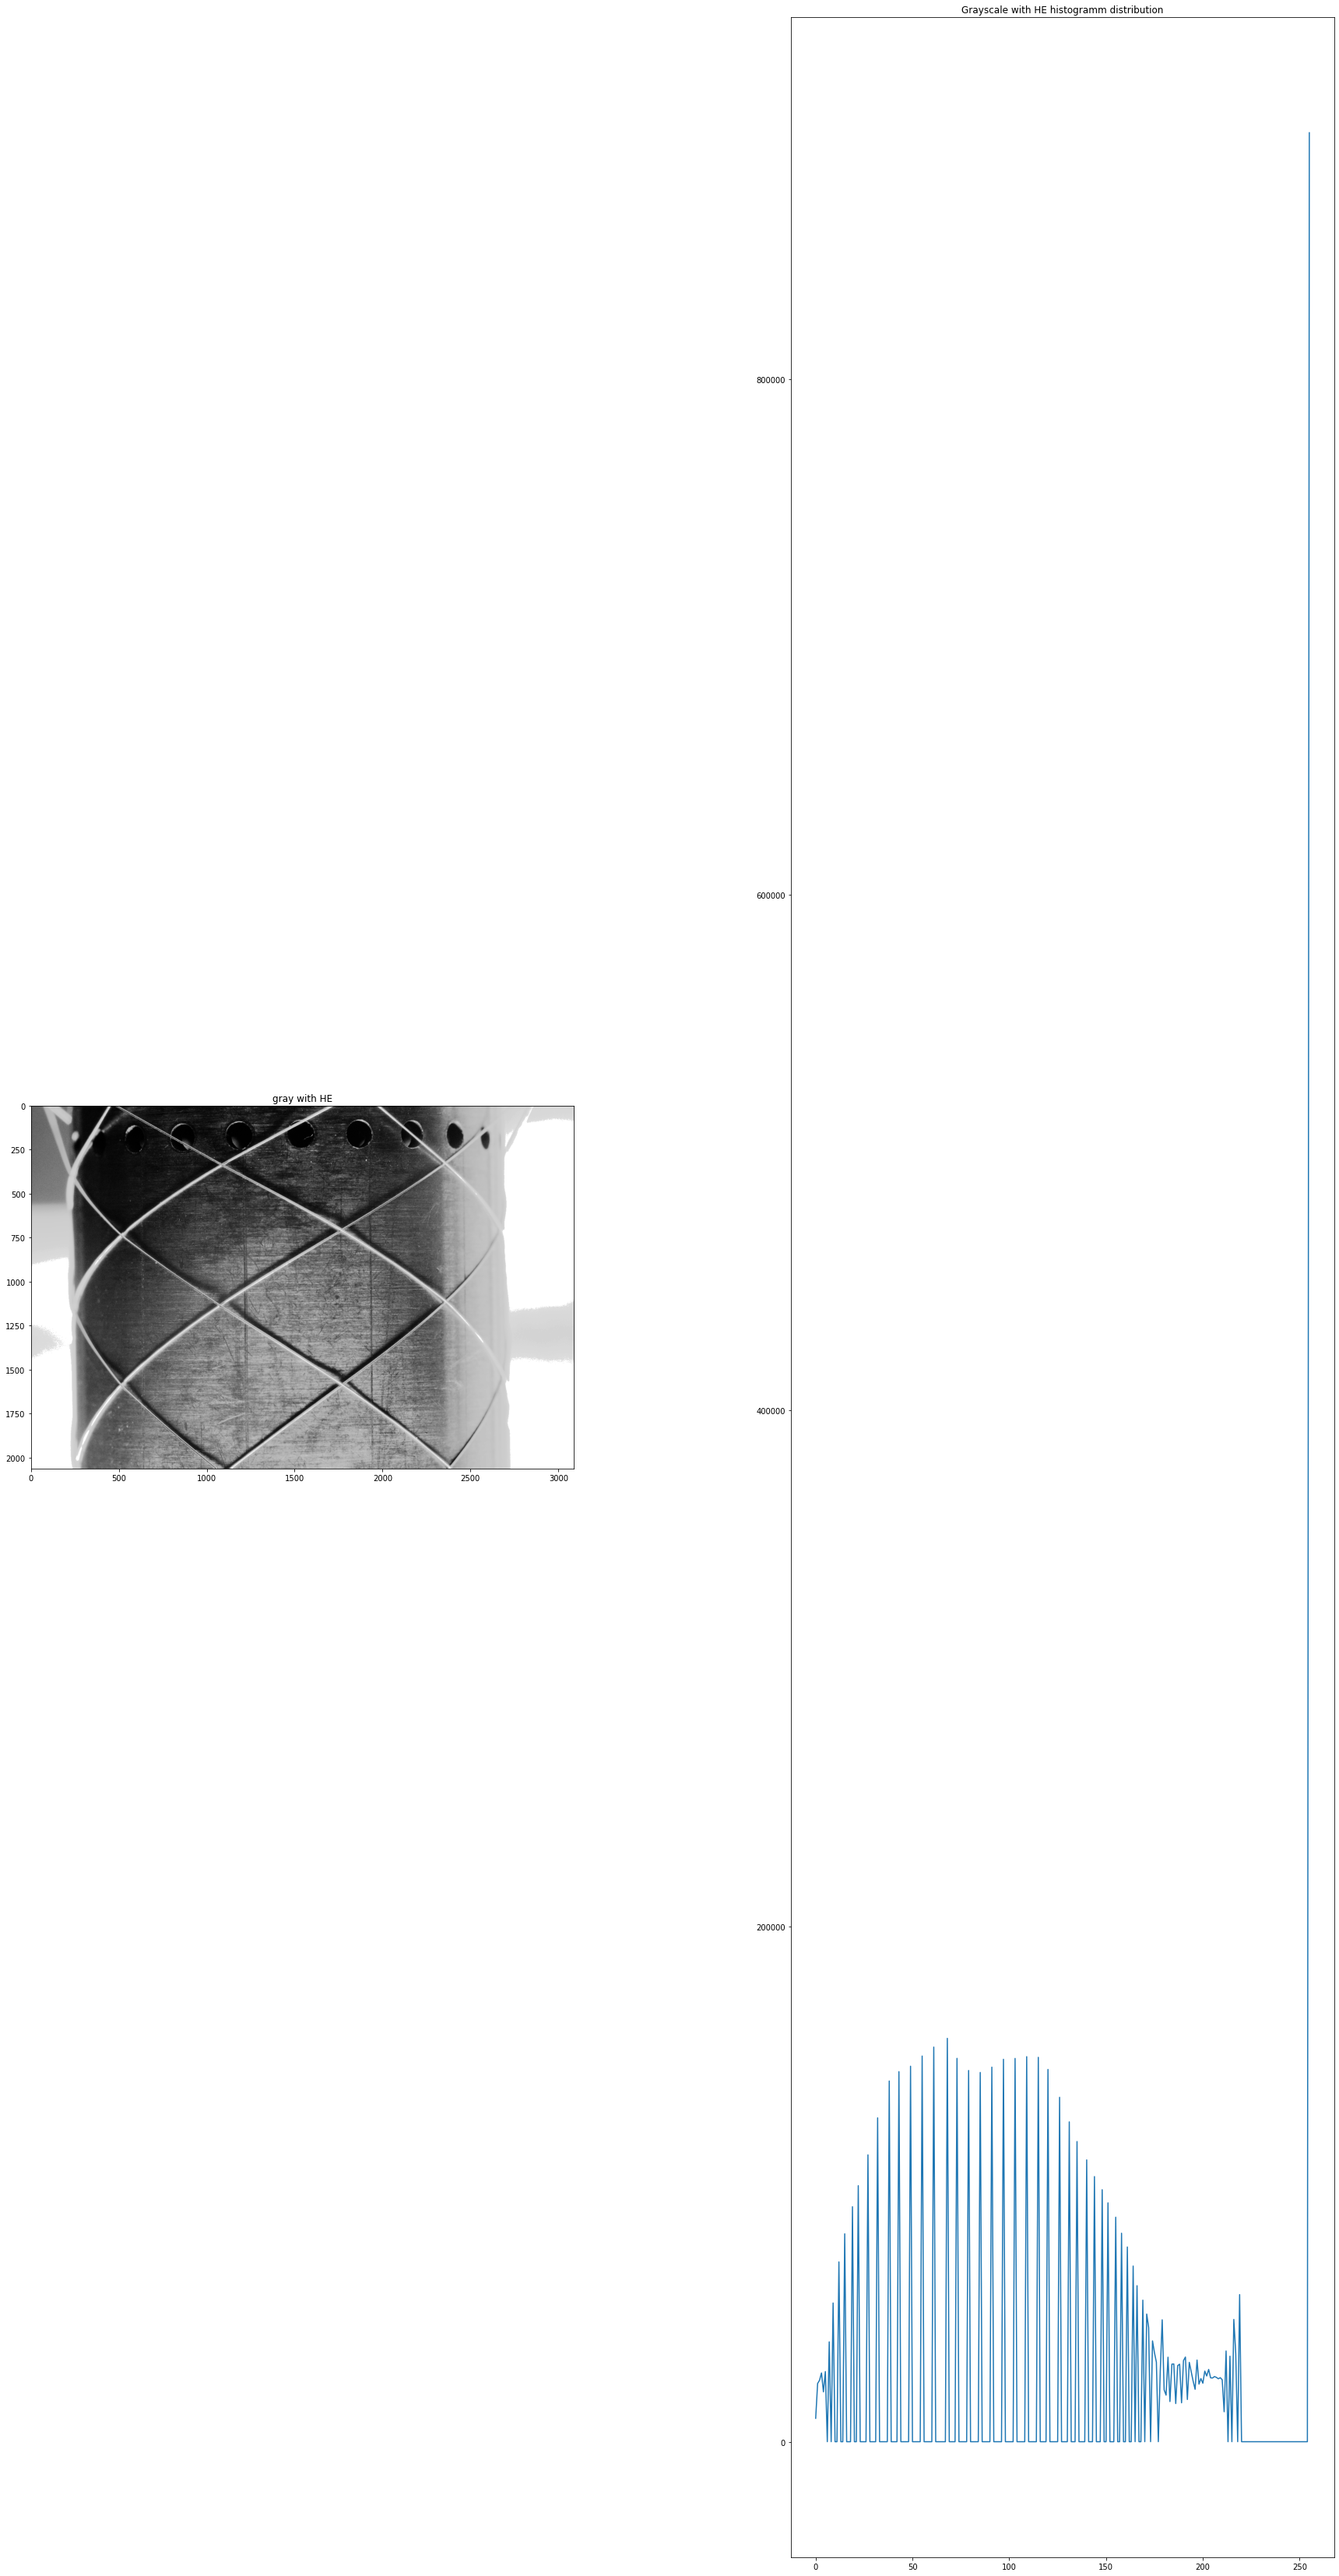

In [36]:
gray_equal = cv2.equalizeHist(img_origin_gray)
hist_gray_equal = cv2.calcHist([gray_equal],[0],None,[256],[0,256])   # shape is (256, 1)

plt.figure(num=2, figsize=(30, 60))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(1, 2, 1)
plt.title('Grayscale with HE')
plt.imshow(gray_equal, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Grayscale with HE')
plt.plot(hist_gray_equal)

2.2 Contrast Limited AHE (CLAHE)

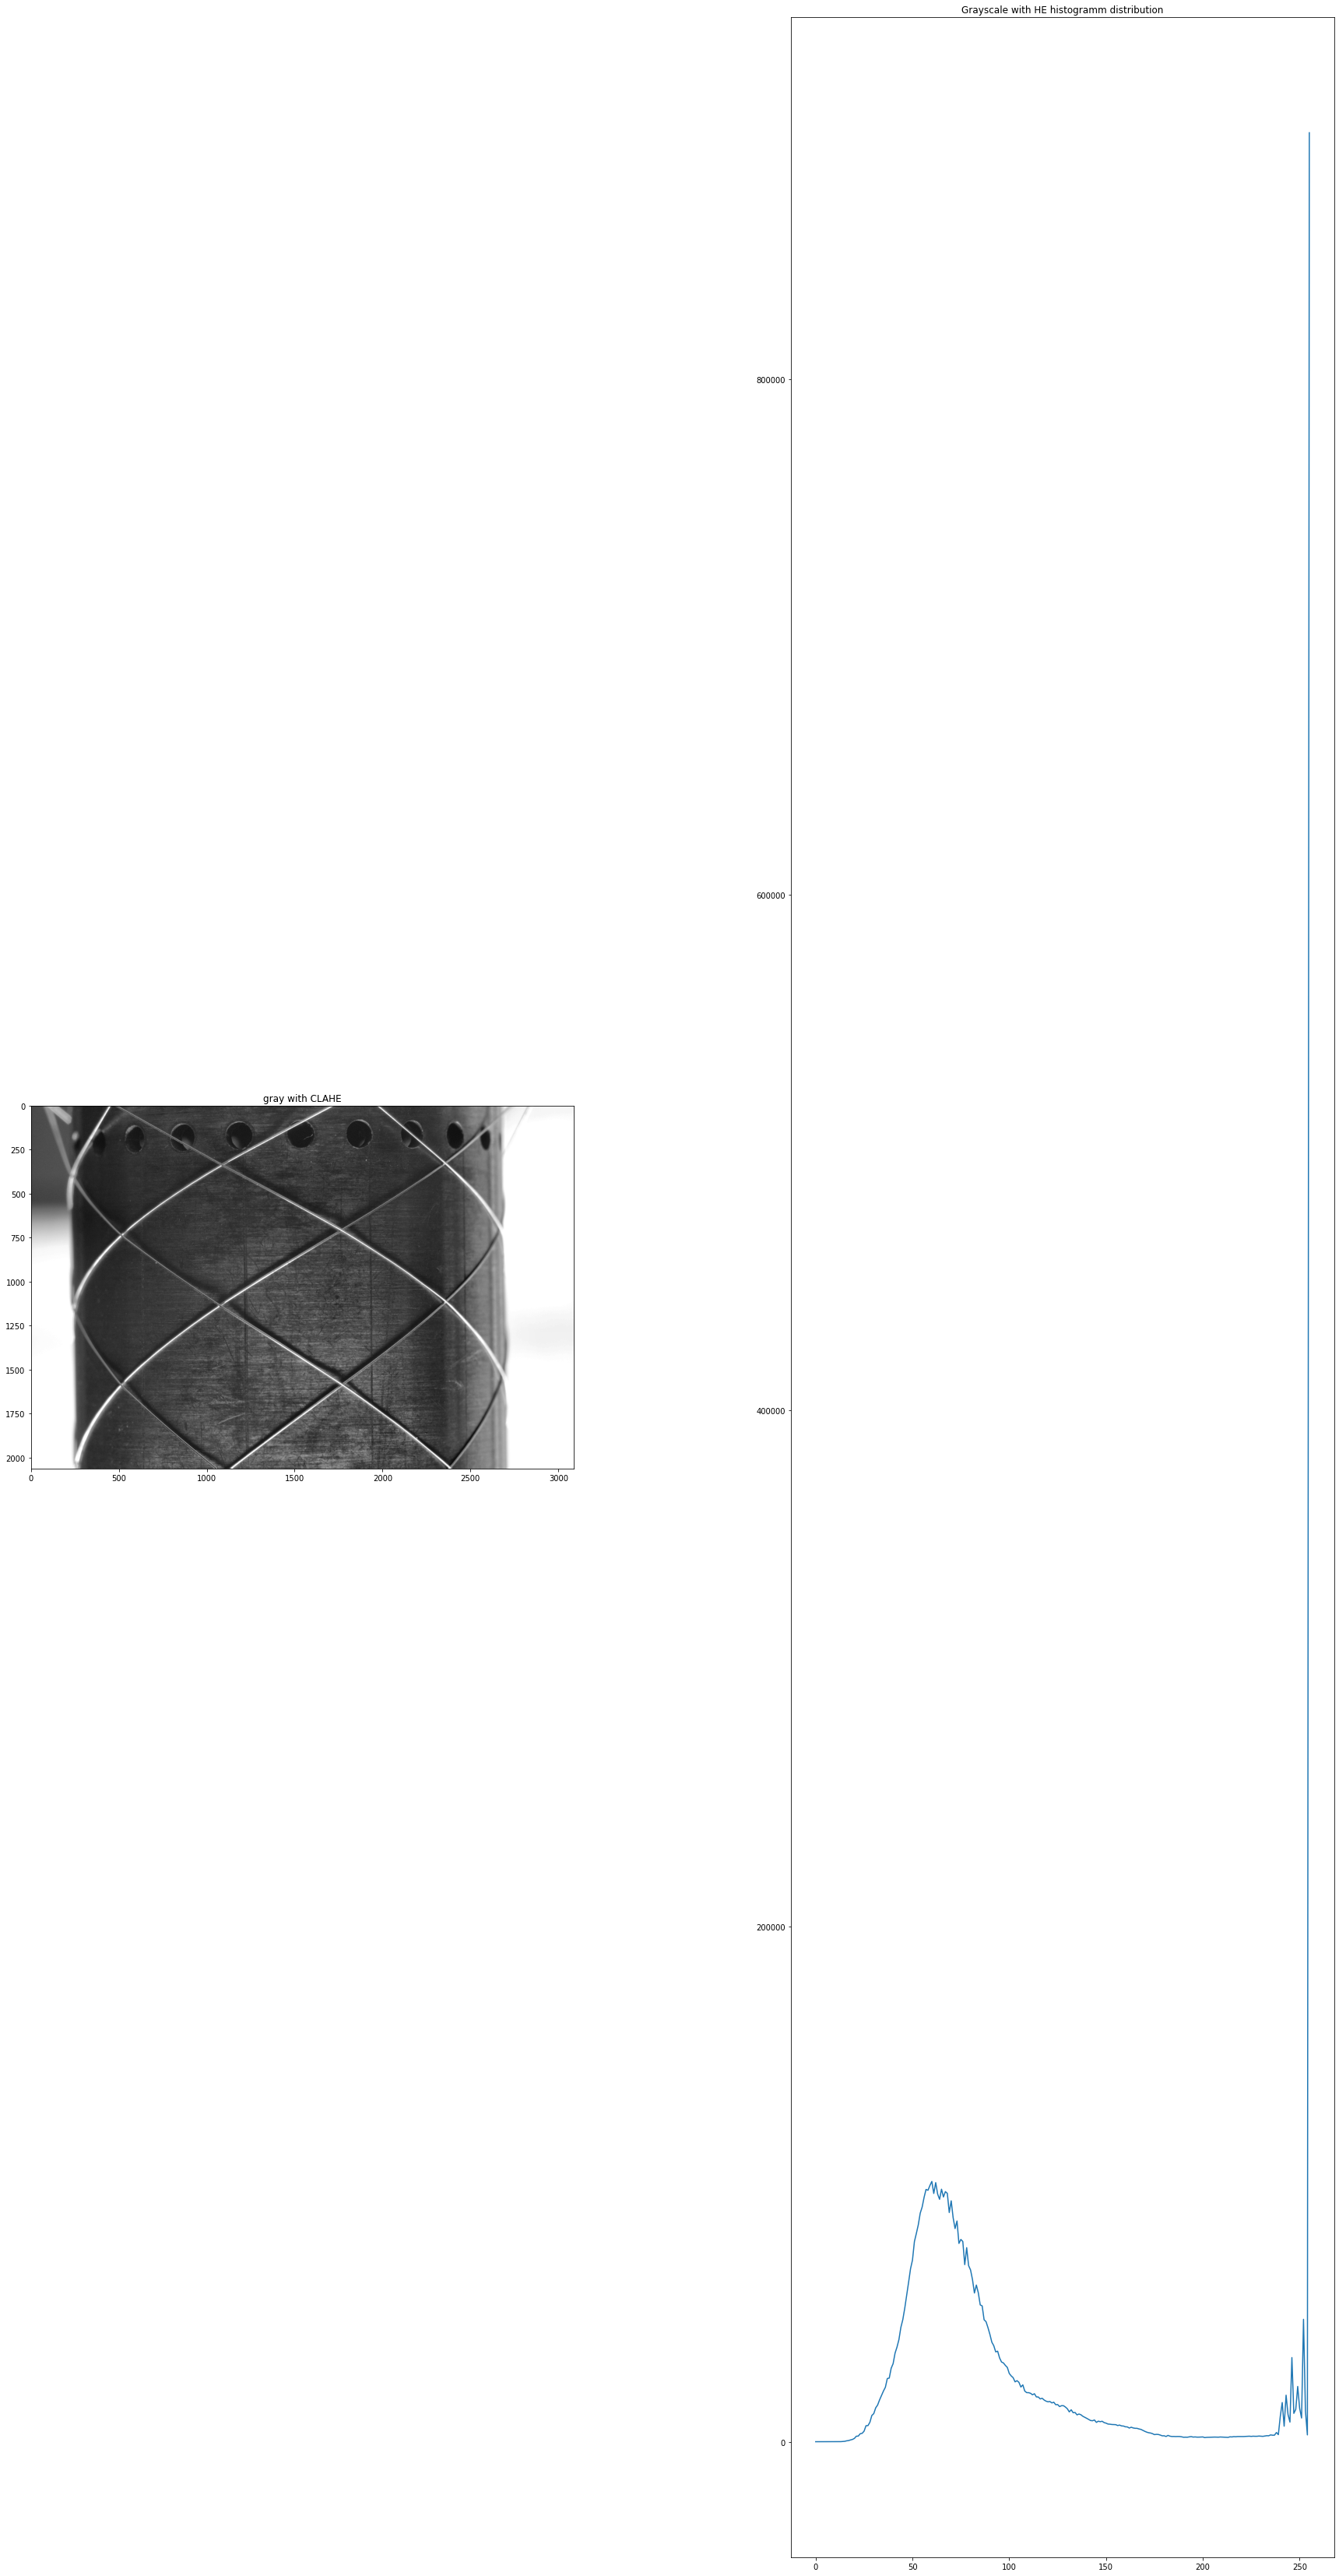

In [37]:
# grayscale
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
gray_clahe = clahe.apply(img_origin_gray)

hist_gray_clahe = cv2.calcHist([gray_clahe],[0],None,[256],[0,256])   # shape is (256, 1)


plt.figure(num=3, figsize=(30, 60))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(1, 2, 1)
plt.title('Grayscale with CLAHE')
plt.imshow(gray_clahe, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Grayscale with CLAHE')
plt.plot(hist_gray_clahe)

Function: trackbar()

In [9]:
# trackbar callback fucntion does nothingtrackbar callback fucntion does nothing
def nothing(x):
    pass

cv2.namedWindow('controls CLAHE', 0)
cv2.resizeWindow("controls CLAHE", 300, 300)  

cv2.createTrackbar('clipLimit','controls CLAHE',1,16,nothing)
cv2.createTrackbar('tileGridSize_width','controls CLAHE',1,16,nothing)
cv2.createTrackbar('tileGridSize_height','controls CLAHE',1,16,nothing)

while True:
    clipLimit = float(cv2.getTrackbarPos('clipLimit','controls CLAHE'))
    tileGridSize_width = int(cv2.getTrackbarPos('tileGridSize_width','controls CLAHE'))
    tileGridSize_height = int(cv2.getTrackbarPos('tileGridSize_height','controls CLAHE'))
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=(tileGridSize_width,tileGridSize_height))
    clahe_gray = clahe.apply(gray)
    
    cv2.imshow('controls CLAHE',clahe_gray)

    # cv2.waitkey(10)
    # waitfor the user to press `Esc` and break the while loop 
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
	    break

error: Unknown C++ exception from OpenCV code

: 